# Visualization for the distill-before-verify experiment with acas_xu

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import seaborn as sns
import os

In [7]:
os.getcwd()

'/Users/jperrsau/cu-src/thesis/src/distill/notebooks/thesis_figures'

## Depth Experiment with Val Loss

In [9]:

experiment = "../../output_data/distill_before_verify_experiment/exp_summit_depth_11_06_2022"
results = pd.read_csv(f"{experiment}/results.csv")
results_teacher = pd.read_csv(f"{experiment}/results.teacher.csv")

In [12]:
results.columns

Index(['num_hidden_layers', 'hidden_layer_width', 'repetition',
       'n_synthetic_data_points', 'synthetic_data_sampling', 'tau', 'a_prev',
       'uuid', 'seed', 'loss', 'sparse_categorical_accuracy', 'val_loss',
       'val_sparse_categorical_accuracy', 'distill_time',
       'trainable_parameters', 'prop.1.result', 'prop.1.python_time',
       'prop.1.reported_runtime', 'prop.1.stdout_result', 'prop.2.result',
       'prop.2.python_time', 'prop.2.reported_runtime', 'prop.2.stdout_result',
       'prop.3.result', 'prop.3.python_time', 'prop.3.reported_runtime',
       'prop.3.stdout_result', 'prop.4.result', 'prop.4.python_time',
       'prop.4.reported_runtime', 'prop.4.stdout_result', 'prop.5.result',
       'prop.5.python_time', 'prop.5.reported_runtime', 'prop.5.stdout_result',
       'prop.6.result', 'prop.6.python_time', 'prop.6.reported_runtime',
       'prop.6.stdout_result', 'prop.7.result', 'prop.7.python_time',
       'prop.7.reported_runtime', 'prop.7.stdout_result', 'p

In [13]:
results.melt(id_vars="num_hidden_layers", value_vars=("val_sparse_categorical_accuracy", "sparse_categorical_accuracy"))

,num_hidden_layers,variable,value
0,1,val_sparse_categorical_accuracy,0.870527
1,1,val_sparse_categorical_accuracy,0.866560
2,1,val_sparse_categorical_accuracy,0.864805
3,1,val_sparse_categorical_accuracy,0.862135
4,1,val_sparse_categorical_accuracy,0.858778
...,...,...,...
355,6,sparse_categorical_accuracy,0.933395
356,6,sparse_categorical_accuracy,0.934570
357,6,sparse_categorical_accuracy,0.932343
358,6,sparse_categorical_accuracy,0.933273


Text(0.5, 1.0, 'Student Training and Validation Loss for Various Depths')

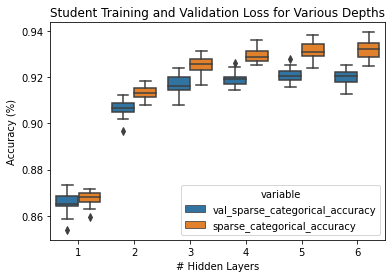

In [16]:
sns.boxplot(
    data=results.melt(
        id_vars="num_hidden_layers",
        value_vars=("val_sparse_categorical_accuracy", "sparse_categorical_accuracy")),
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.xlabel("# Hidden Layers")
plt.ylabel("Accuracy (%)")
plt.title("Student Training and Validation Loss for Various Depths")
#plt.savefig("viz_10_17_2022/loss_for_depth.pdf")

Text(0.5, 1.0, 'Time to Verify for Various Depths')

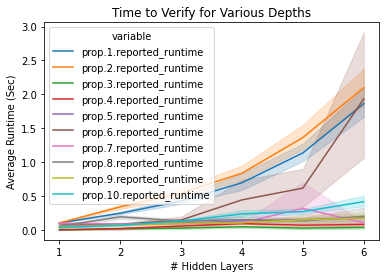

In [31]:
columns = [f'prop.{p}.reported_runtime' for p in range(1,11)]
filtered_results = results.melt(
        id_vars="num_hidden_layers",
        value_vars=columns)
filtered_results["value"] = filtered_results["value"].where(filtered_results["value"]!="SafeBeforeEnumerate", 0.0)
filtered_results["value"] = filtered_results["value"].astype("float32")

sns.lineplot(
    data=filtered_results,
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Average Runtime (Sec)")
plt.xlabel("# Hidden Layers")
plt.title("Time to Verify for Various Depths")
#plt.savefig("viz_10_17_2022/time_for_depth.pdf")

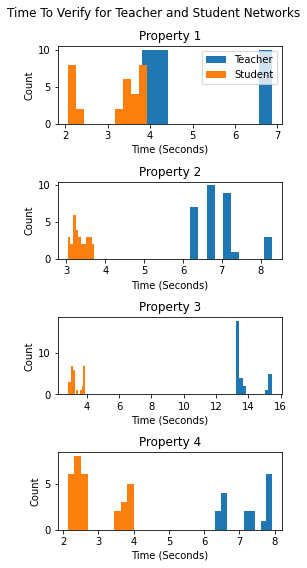

In [6]:
plt.figure(figsize=(4,8))
for p in [1,2,3,4]:
    plt.subplot(4,1,p)
    plt.hist(results_teacher[(results_teacher[f"prop.{p}.result"]!="error")][f"prop.{p}.python_time"], label="Teacher")
    plt.hist(results[(results["num_hidden_layers"]==5) & (results[f"prop.{p}.result"]!="error")][f"prop.{p}.python_time"], label="Student")
    if p==1:
        plt.legend()
    plt.title(f"Property {p}")
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Count")

plt.suptitle("Time To Verify for Teacher and Student Networks")
plt.tight_layout()
plt.savefig("viz_10_17_2022/time_depth5_detail.pdf")

In [7]:
results[(results["num_hidden_layers"]==8) & (results[f"prop.{p}.result"]!="error")][f"prop.{p}.reported_runtime"]

180    0.1
181   -1.0
182    0.1
183   -1.0
184    0.2
185    0.2
186   -1.0
187    0.1
188   -1.0
189    0.2
190   -1.0
191   -1.0
192    0.2
193    0.2
194    0.2
195   -1.0
196    0.3
197   -1.0
198    0.2
199   -1.0
200    0.1
201   -1.0
202   -1.0
203   -1.0
204    0.1
205    0.2
206    0.3
207    0.1
208    0.1
209   -1.0
Name: prop.4.reported_runtime, dtype: float64

In [8]:
results_teacher[(results_teacher[f"prop.{p}.result"]!="error")][f"prop.{p}.reported_runtime"]

1     3.2
2     3.2
4     3.2
6     3.2
7     3.1
11    3.1
13    3.2
16    3.2
19    3.1
20    3.2
21    3.2
22    3.1
23    3.1
24    3.1
25    3.2
27    3.2
29    3.1
Name: prop.4.reported_runtime, dtype: float64

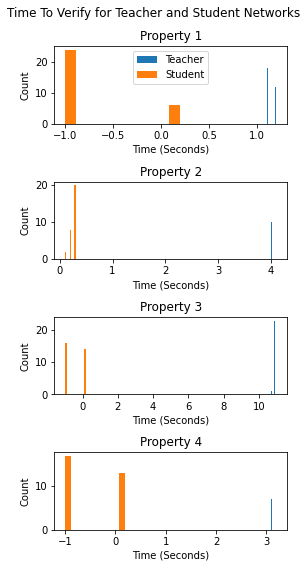

In [9]:
plt.figure(figsize=(4,8))
for p in [1,2,3,4]:
    plt.subplot(4,1,p)
    plt.hist(results_teacher[(results_teacher[f"prop.{p}.result"]!="error")][f"prop.{p}.reported_runtime"], label="Teacher")
    plt.hist(results[(results["num_hidden_layers"]==5) & (results[f"prop.{p}.result"]!="error")][f"prop.{p}.reported_runtime"], label="Student")
    if p==1:
        plt.legend()
    plt.title(f"Property {p}")
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Count")

plt.suptitle("Time To Verify for Teacher and Student Networks")
plt.tight_layout()
plt.savefig("viz_10_17_2022/time_depth5_detail.pdf")

Property 1
Teacher Network
holds    30
Name: prop.1.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.1.result, dtype: float64
Teacher Miss Rate for Property 1 = 0.0
Property 1
Student Network
holds    210
Name: prop.1.result, dtype: int64
Property 2
Teacher Network
holds    30
Name: prop.2.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.2.result, dtype: float64
Teacher Miss Rate for Property 2 = 0.0
Property 2
Student Network
holds       140
violated     70
Name: prop.2.result, dtype: int64
Property 3
Teacher Network
holds    30
Name: prop.3.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.3.result, dtype: float64
Teacher Miss Rate for Property 3 = 0.0
Property 3
Student Network
holds       182
violated     28
Name: prop.3.result, dtype: int64
Property 4
Teacher Network
holds    17
error    13
Name: prop.4.result, dtype: int64
holds       17.0
violated     0.0
error       13.0
Name: p

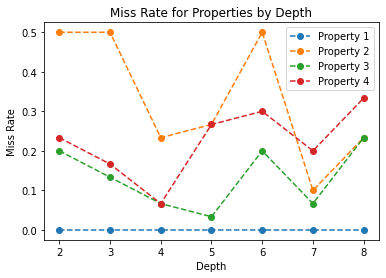

In [10]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

for property in [1,2,3,4]:
    print(f"Property {property}")
    print("Teacher Network")
    print(results_teacher[f'prop.{property}.result'].value_counts())

    count_results = results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    print(f"Property {property}")
    print("Student Network")
    print(results[f'prop.{property}.result'].value_counts())

    count_results = results.groupby("num_hidden_layers")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    plt.plot(student_miss_rate, label=f"Property {property}", marker="o", linestyle="--")

plt.legend()
plt.ylabel("Miss Rate")
plt.xlabel("Depth")
plt.title("Miss Rate for Properties by Depth")
plt.savefig("viz_10_17_2022/miss_rate_depth.pdf")
plt.show()




## ndata experiment

In [11]:
experiment = "output/exp_alpine_ndata_val_10_17_2022"
ndata_results = pd.read_csv(f"./{experiment}/results.csv")
ndata_results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

FileNotFoundError: [Errno 2] No such file or directory: './output/exp_alpine_ndata_val_10_17_2022/results.csv'

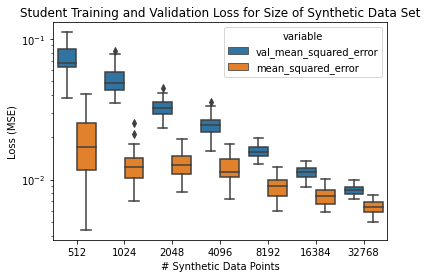

In [ ]:
sns.boxplot(
    data=ndata_results.melt(
        id_vars="n_synthetic_data_points",
        value_vars=("val_mean_squared_error", "mean_squared_error")),
    x="n_synthetic_data_points",
    y="value",
    hue="variable")
    #err_style="bars")
plt.yscale("log")
plt.xlabel("# Synthetic Data Points")
plt.ylabel("Loss (MSE)")
plt.title("Student Training and Validation Loss for Size of Synthetic Data Set")
plt.savefig("viz_10_17_2022/loss_for_ndata.pdf")

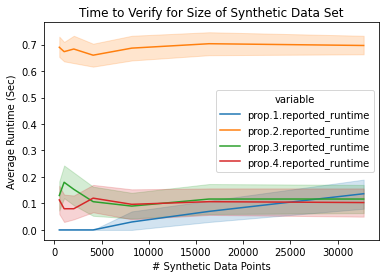

In [ ]:
columns = [f'prop.{p}.reported_runtime' for p in [1,2,3,4]]
filtered_results = ndata_results.melt(
        id_vars="n_synthetic_data_points",
        value_vars=columns)
filtered_results["value"] = filtered_results["value"].where(filtered_results["value"] != -1, 0)

sns.lineplot(
    data=filtered_results,
    x="n_synthetic_data_points",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Average Runtime (Sec)")
plt.xlabel("# Synthetic Data Points")
plt.title("Time to Verify for Size of Synthetic Data Set")
plt.savefig("viz_10_17_2022/time_for_ndata.pdf")

Property 1
Teacher Network
holds    30
Name: prop.1.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.1.result, dtype: float64
Teacher Miss Rate for Property 1 = 0.0
Property 1
Student Network
holds    210
Name: prop.1.result, dtype: int64
Property 2
Teacher Network
holds    30
Name: prop.2.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.2.result, dtype: float64
Teacher Miss Rate for Property 2 = 0.0
Property 2
Student Network
holds       136
violated     74
Name: prop.2.result, dtype: int64
Property 3
Teacher Network
holds    30
Name: prop.3.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.3.result, dtype: float64
Teacher Miss Rate for Property 3 = 0.0
Property 3
Student Network
holds       176
violated     34
Name: prop.3.result, dtype: int64
Property 4
Teacher Network
holds    30
Name: prop.4.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.4.result

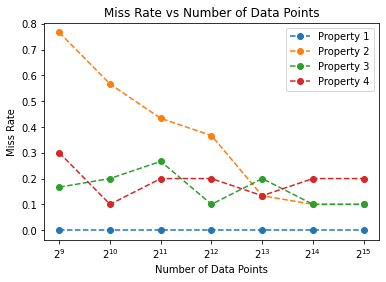

In [ ]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

for property in [1,2,3,4]:
    print(f"Property {property}")
    print("Teacher Network")
    print(ndata_results_teacher[f'prop.{property}.result'].value_counts())

    count_results = ndata_results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    print(f"Property {property}")
    print("Student Network")
    print(ndata_results[f'prop.{property}.result'].value_counts())

    count_results = ndata_results.groupby("n_synthetic_data_points")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    plt.plot(student_miss_rate, label=f"Property {property}", marker="o", linestyle="--")

plt.legend()
plt.ylabel("Miss Rate")
plt.xlabel("Number of Data Points")
plt.gca().set_xscale("log", base=2)
# plt.gca().set_yscale("log")
plt.title("Miss Rate vs Number of Data Points")
plt.savefig("viz_10_17_2022/miss_rate_ndata.pdf")
plt.show()




## Visualize Classification Landscape

In [1]:
import onnx
import onnx_tf
import onnxruntime

import numpy as np

In [3]:
teacher = onnx.load("/Users/jperrsau/cu-src/thesis/src/nnenum/examples/acasxu/data/ACASXU_run2a_1_1_batch_2000.onnx")
teacher = onnx_tf.backend.prepare(teacher)

2022-11-01 17:27:41.176818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Input Scaling

nx, ny = (100, 100)

theta = np.linspace(-0.5, 0.5, nx) # Angle to intruder
rho = np.linspace(-0.328422877, 0.5, ny) # Distance to intruder
psi = 0.1 # Angle of intruder relative to angle of ownship
vown = 0.1 # Velocity of ownship
vint = 0.1 # Velocity of intruder

coords = np.zeros(shape=(100*100,1,1,5),dtype="float32")
coords[:,0,0,2] = psi
coords[:,0,0,3] = vown
coords[:,0,0,4] = vint

coords[:,0,0,0] = np.meshgrid(theta, rho)[0].flatten()
coords[:,0,0,1] = np.meshgrid(theta, rho)[1].flatten()

In [5]:
onnx_outputs = teacher.run(coords)

outputs = onnx_outputs.linear_7_Add

In [6]:
outputs.argmax(axis=1)

array([3, 3, 3, ..., 1, 1, 1])

In [7]:
def pol2cart(r,theta):
    z = r * np.exp(1j * theta)
    x, y = z.real, z.imag
    return x, y

In [8]:
cart_x,cart_y = pol2cart(coords[:,0,0,1], (np.pi / 0.5) * coords[:,0,0,0])

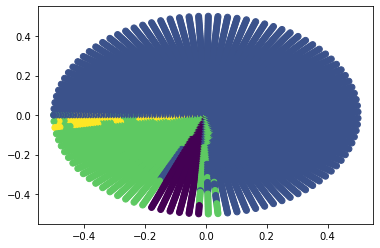

In [9]:
#acas_cmap = [(1,1,0.5), (1,1,0.75), (1,1,1), (0.75,1,1), (0.5,1,1)]

plt.scatter(cart_x, cart_y, c=outputs.argmax(axis=1))#, cmap=acas_cmap)

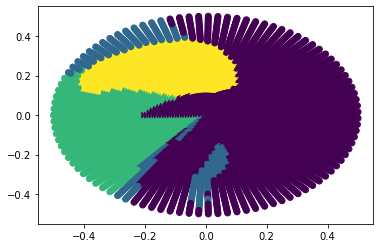

In [10]:
student = onnx.load("/Users/jperrsau/cu-src/thesis/src/distill/output_data/distill_before_verify_experiment/exp_alpine_depth_val_10_17_2022/0cd6acbf-6218-4c02-8a92-55a90d85ffe4/student.onnx")
student = onnx_tf.backend.prepare(student)

student_outputs = student.run(coords.reshape((100*100,5)))
student_outputs = student_outputs.dense_126.argmax(axis=1)

plt.scatter(cart_x, cart_y, c=student_outputs)

## Compute Accuracy of Student with respect to Teacher

In [16]:
import os
import onnx
import onnx_tf
import onnxruntime
import tf2onnx
import numpy as np

In [17]:
samples = 10000
inputs = (np.random.random((samples,1,1,5))-0.5).astype("float32")*2

teacher = onnx.load("/Users/jperrsau/cu-src/thesis/src/nnenum/examples/acasxu/data/ACASXU_run2a_1_1_batch_2000.onnx")
teacher = onnx_tf.backend.prepare(teacher)

student = onnx.load("/Users/jperrsau/cu-src/thesis/src/distill/output_data/distill_before_verify_experiment/exp_alpine_depth_val_10_17_2022/0cd6acbf-6218-4c02-8a92-55a90d85ffe4/student.onnx")
student = onnx_tf.backend.prepare(student)

teacher_outputs = teacher.run(inputs)
student_outputs = student.run(inputs.reshape((samples,5)))

teacher_outputs_cat = teacher_outputs.linear_7_Add.argmax(axis=1)
student_outputs_cat = student_outputs.dense_126.argmax(axis=1)

(student_outputs_cat == teacher_outputs_cat).sum() / samples

0.5958

In [25]:
type(student_outputs)

onnx.backend.base.Outputs

In [27]:
student_outputs.get_outputs()

AttributeError: 'Outputs' object has no attribute 'get_outputs'

## Training for Accuracy

In [1]:
from experiment_lib import load_vnncomp_2021_acasxu_network, distill, check_closeness, write_tf_network_to_onnx_file
import pandas as pd
import sys
import multiprocessing as mp
import tqdm
import time
import pathlib
import json

In [5]:
import matplotlib.pyplot as plt

In [11]:
teacher = load_vnncomp_2021_acasxu_network(1, 1, path="../../data/acasxu")

In [12]:
runs = []
for i in range(10):
    runs.append(distill(teacher,
        20000,
        "random_iid",
        50,
        6))

In [13]:
for student, history in runs:
    print(history.history["categorical_accuracy"][-1])

0.35589998960494995
0.3225499987602234
0.3709999918937683
0.32420000433921814
0.382999986410141
0.35420000553131104
0.3452500104904175
0.4110499918460846
0.34630000591278076
0.3303999900817871


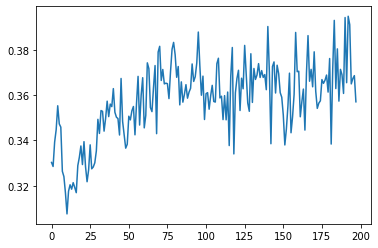

In [9]:
plt.plot(history.history["categorical_accuracy"])

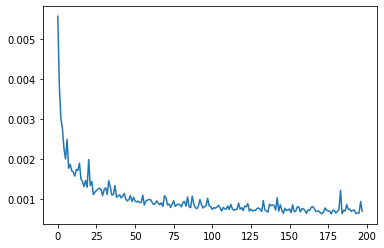

In [10]:
plt.plot(history.history["val_loss"])

## Explore test output 11_04_22

In [1]:
import pandas as pd

In [4]:
pd.read_csv("exp_test_11_04_2022/results.csv")["val_categorical_accuracy"]

0    0.333333
1    0.303922
Name: val_categorical_accuracy, dtype: float64